In [ ]:
# Part 1 - Data Preprocessing
# Importing the libraries导入需要的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# set the seed_num
import os
import random
import tensorflow as tf
seed_num = 42
os.environ['PYTHONHASHSEED']=str(seed_num)
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
# early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=20,
                          verbose=2)

mc = ModelCheckpoint(filepath='best_model.h5',
                     monitor='val_acc',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

In [ ]:
# 读取数据
data = pd.read_csv('baoli.csv', skiprows=2) #读取CSV文件,并跳过前两行
# 剔除缺省值
data =data[(data != 0).all(axis=1)]
data.head()

# data.to_csv('processed_WanKeA.csv', index=False)

,date,open,close,high,low,volume
0,2014/1/2,8.19,8.18,8.26,8.13,32159157
1,2014/1/3,8.13,8.11,8.20,8.05,25517581
2,2014/1/6,8.08,7.65,8.08,7.62,76409223
3,2014/1/7,7.63,7.58,7.70,7.55,40229837
4,2014/1/8,7.60,7.51,7.70,7.45,50442084


In [ ]:
#显示数据集的前几行，查看样式
print(data.head())
all_data = data.iloc[:, 1:6]
all_data.head()

       date  open  close  high   low    volume
0  2014/1/2  8.19   8.18  8.26  8.13  32159157
1  2014/1/3  8.13   8.11  8.20  8.05  25517581
2  2014/1/6  8.08   7.65  8.08  7.62  76409223
3  2014/1/7  7.63   7.58  7.70  7.55  40229837
4  2014/1/8  7.60   7.51  7.70  7.45  50442084


,open,close,high,low,volume
0,8.19,8.18,8.26,8.13,32159157
1,8.13,8.11,8.20,8.05,25517581
2,8.08,7.65,8.08,7.62,76409223
3,7.63,7.58,7.70,7.55,40229837
4,7.60,7.51,7.70,7.45,50442084


In [ ]:
all_data = all_data.loc[:,['open', 'close', "high", "low", "volume"]]

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2427 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2427 non-null   float64
 1   close   2427 non-null   float64
 2   high    2427 non-null   float64
 3   low     2427 non-null   float64
 4   volume  2427 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 113.8 KB


In [ ]:
all_data.describe()

,open,close,high,low,volume
count,2427.000000,2427.000000,2427.000000,2427.00000,2.427000e+03
mean,12.261652,12.275282,12.490630,12.05616,1.063098e+08
std,3.182137,3.182906,3.250461,3.11929,9.494568e+07
min,4.830000,4.860000,4.950000,4.83000,1.393272e+07
25%,9.630000,9.645000,9.785000,9.52000,5.317387e+07
50%,12.700000,12.750000,12.940000,12.51000,7.834428e+07
75%,14.865000,14.890000,15.135000,14.61000,1.189573e+08
max,18.880000,19.320000,19.880000,18.58000,9.433462e+08


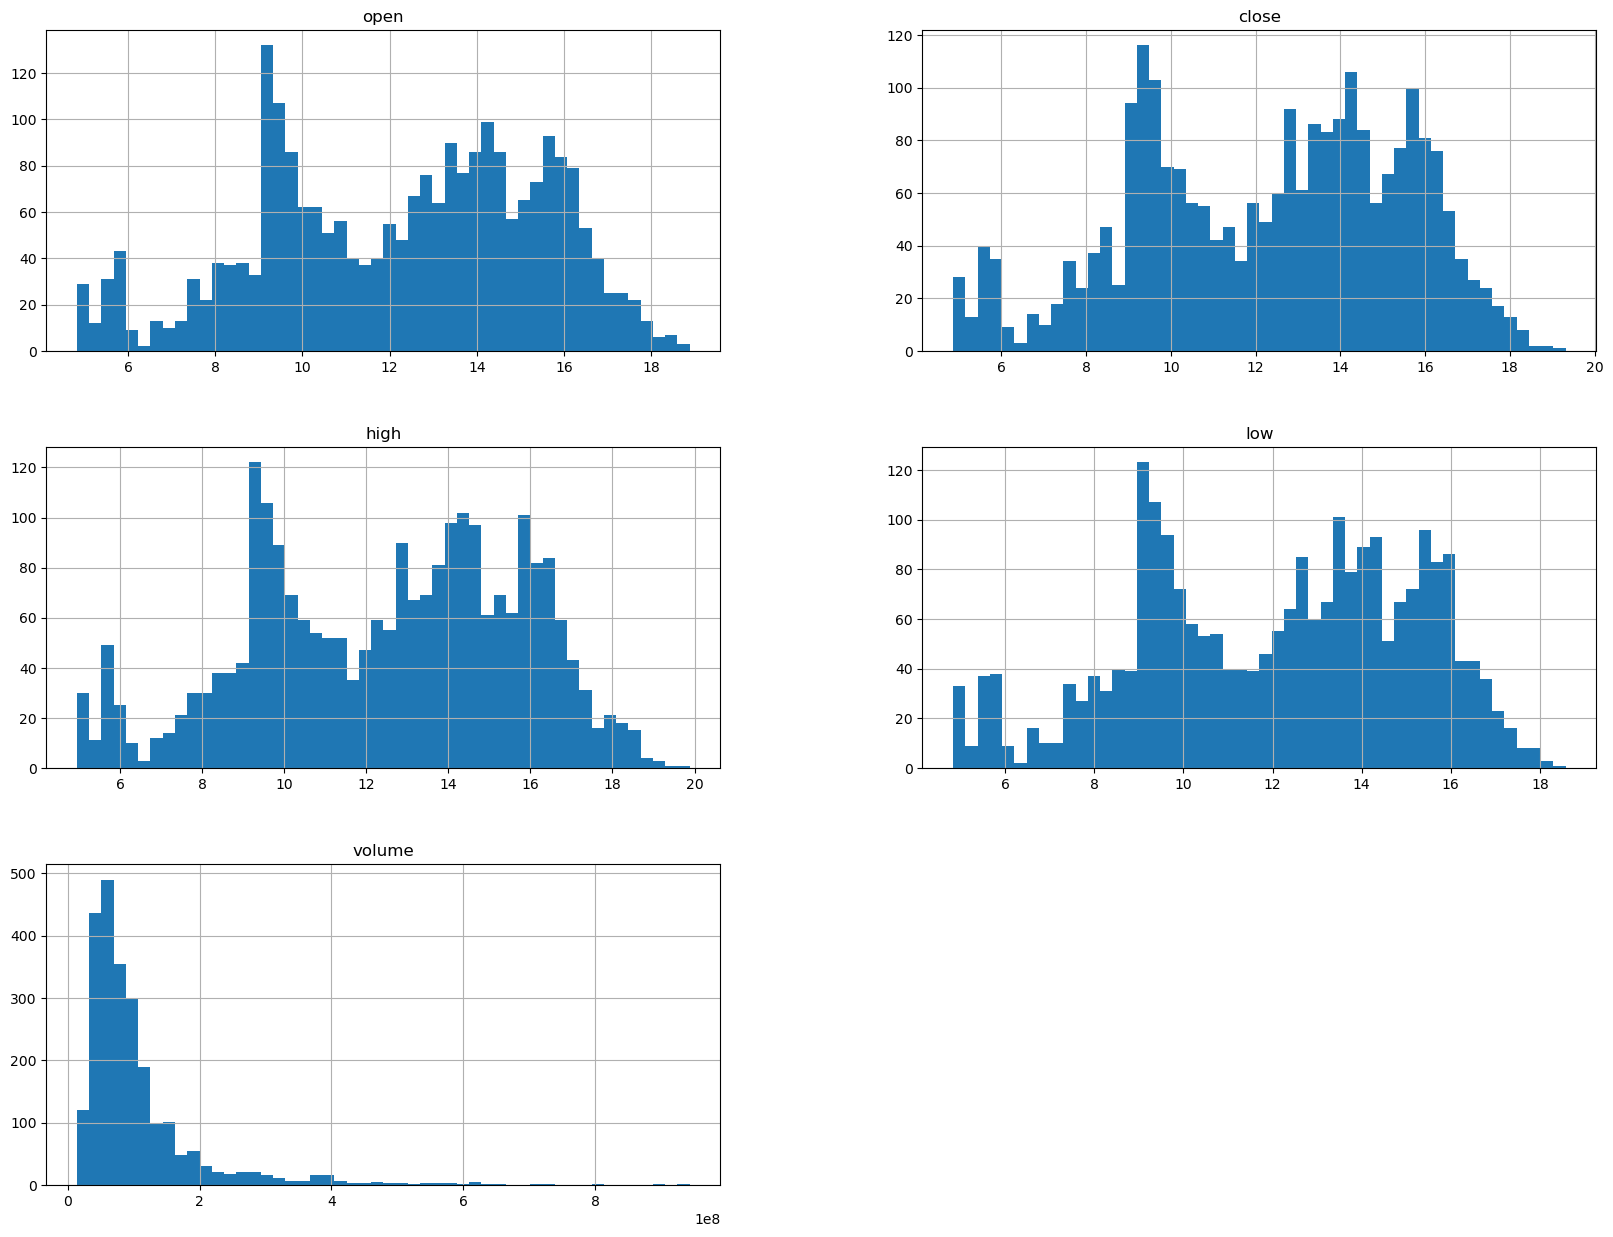

In [ ]:
all_data.hist(bins = 50 , figsize = (20, 15))
plt.show()

In [ ]:
# Feature Scaling特征归一化，归一化很重要，消除量纲的差异。
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1),)
all_data_scaled = sc.fit_transform(all_data)
print(all_data_scaled)
print('训练数据长度是:',len(all_data_scaled))

[[0.23914591 0.22959889 0.22170127 0.24       0.01961069]
 [0.23487544 0.22475795 0.21768252 0.23418182 0.0124647 ]
 [0.23131673 0.19294606 0.20964501 0.20290909 0.06722143]
 ...
 [0.33380783 0.32019364 0.31212324 0.336      0.04640368]
 [0.32953737 0.35200553 0.33757535 0.32872727 0.10666231]
 [0.36085409 0.34854772 0.34293369 0.36290909 0.06622817]]
训练数据长度是: 2427


In [ ]:
# 设置循环核时间步timestep为60。
features = []
labels = []
for i in range(60, len(all_data_scaled)):
    features.append(all_data_scaled[i-60:i, ])
    labels.append(all_data_scaled[i, 1])
features, labels = np.array(features), np.array(labels)
features = np.reshape(features, (features.shape[0], features.shape[1], -1))
# 数据集按8：1：1划分,即2014/1/1~2022/1/1：2022年：2023年
x_train,x_val,x_test,y_train,y_val,y_test= features[:1944],features[1944 :2189],features[2189:],labels[:1944],labels[1944 :2189],labels[2189:]
print('shape of x_train:',x_train.shape)
print('shape of x_val:',x_val.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_val:',y_val.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (1944, 60, 5)
shape of x_val: (245, 60, 5)
shape of x_test: (178, 60, 5)
shape of y_train: (1944,)
shape of y_val: (245,)
shape of y_test: (178,)


In [ ]:
# Part 2 - Building the LSTM
# Importing the Keras libraries and packages
import warnings
warnings.filterwarnings("ignore")
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 5))) #输入特征的维数
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
#编译训练模型重点#
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Summarize Model 模型可视化
print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

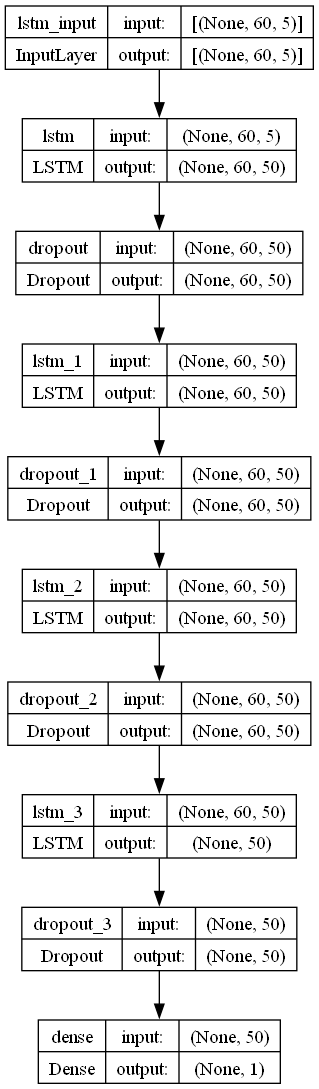

In [ ]:
from keras.utils import plot_model
plot_model(regressor, to_file='model.png', show_shapes=True, show_layer_names=True) # plot my model

In [ ]:
# import keras #回调函数
# class LossHistory(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = {'batch':[], 'epoch':[]}
#         self.accuracy = {'batch':[], 'epoch':[]}
#         self.val_loss = {'batch':[], 'epoch':[]}
#         self.val_acc = {'batch':[], 'epoch':[]}

#     def on_batch_end(self, batch, logs={}):
#         self.losses['batch'].append(logs.get('loss'))
#         self.accuracy['batch'].append(logs.get('acc'))
#         self.val_loss['batch'].append(logs.get('val_loss'))
#         self.val_acc['batch'].append(logs.get('val_acc'))

#     def on_epoch_end(self, batch, logs={}):
#         self.losses['epoch'].append(logs.get('loss'))
#         self.accuracy['epoch'].append(logs.get('acc'))
#         self.val_loss['epoch'].append(logs.get('val_loss'))
#         self.val_acc['epoch'].append(logs.get('val_acc'))

#     def loss_plot(self, loss_type):
#         iters = range(len(self.losses[loss_type]))
#         plt.figure()
#         # loss
#         plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
#         if loss_type == 'epoch':
#             # val_loss
#             plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
#         plt.grid(True)
#         plt.xlabel(loss_type)
#         plt.ylabel('acc-loss')
#         plt.legend(loc="upper right")
#         plt.show()

In [ ]:
# Fit the model to the training set
history=regressor.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=(x_val, y_val),callbacks=[mc, earlystop])

Epoch 1/200
61/61 [==============================] - 7s 27ms/step - loss: 0.0303 - val_loss: 0.0049
Epoch 2/200
61/61 [==============================] - 1s 12ms/step - loss: 0.0072 - val_loss: 0.0051
Epoch 3/200
61/61 [==============================] - 1s 12ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 4/200
61/61 [==============================] - 1s 12ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 5/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 6/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 7/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 8/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 9/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 10/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0042 - val_loss: 0.0030

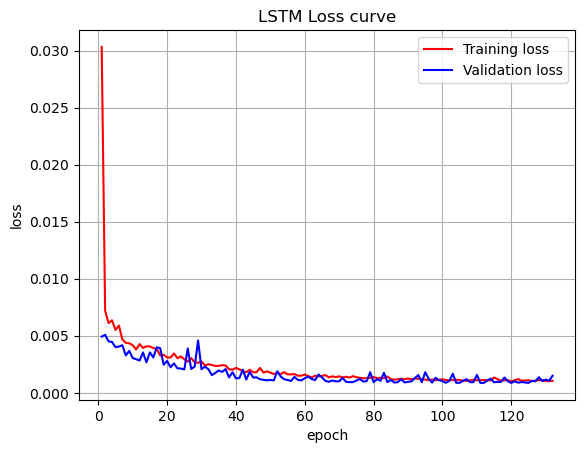

In [ ]:
#画损失曲线图
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.title('LSTM Loss curve')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
sc_one = MinMaxScaler(feature_range = (0, 1))
sc_one.fit_transform(all_data.iloc[:, 1:2])
predicted_stock_train = regressor.predict(x_train)
predicted_stock_train = sc_one.inverse_transform(predicted_stock_train)
predicted_stock_test = regressor.predict(x_test)
predicted_stock_test = sc_one.inverse_transform(predicted_stock_test)
real_price_train=sc_one.inverse_transform(np.reshape(y_train,(-1,1)))
real_price_test=sc_one.inverse_transform(np.reshape(y_test,(-1,1)))

6/6 [==============================] - 0s 6ms/step


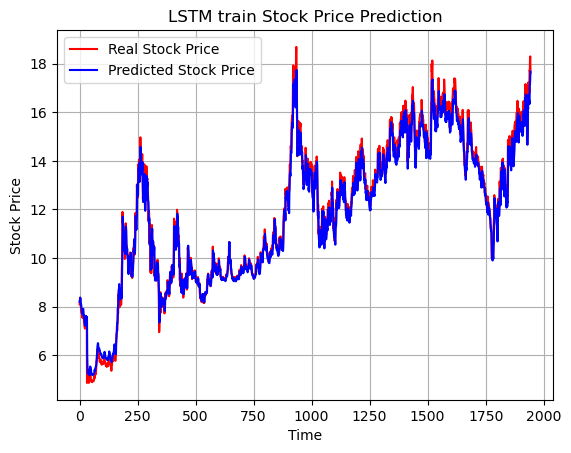

In [ ]:
# Visualising the test results
plt.plot(real_price_train, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('LSTM train Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

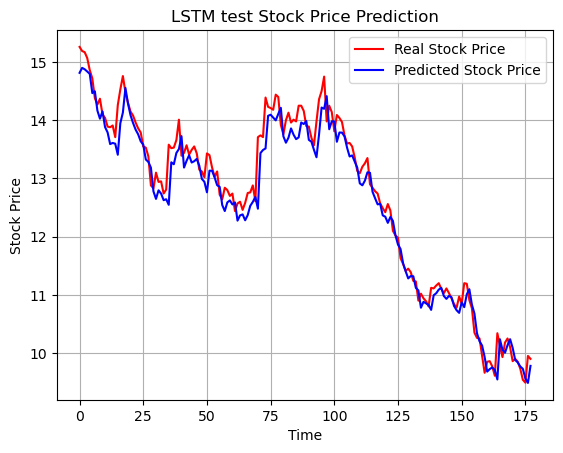

In [ ]:
# Visualising the test results
plt.plot(real_price_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_test, color = 'blue', label = 'Predicted Stock Price')
plt.title('LSTM test Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import math
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_test, real_price_test)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt( mean_squared_error(predicted_stock_test, real_price_test))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_test, real_price_test)

mape = mean_absolute_percentage_error(predicted_stock_test, real_price_test)

r2=r2_score(predicted_stock_test, real_price_test)

print('LSTM模型的MSE是: %.6f' % mse)
print('LSTM模型的RMSE是: %.6f' % rmse)
print('LSTM模型的MAE是: %.6f' % mae)
print('LSTM模型的MAPE是: %.6f' % mape)
print('LSTM模型的R^2是: %.6f' % r2)

LSTM模型的MSE是: 0.081629
LSTM模型的RMSE是: 0.285707
LSTM模型的MAE是: 0.211841
LSTM模型的MAPE是: 0.016762
LSTM模型的R^2是: 0.961041


In [ ]:
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [ ]:
#GRU
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],5)))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50, return_sequences=True))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50, return_sequences=True))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(GRU(units=50))
regressorGRU.add(Dropout(0.2))
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
print(regressorGRU.summary()) # Summarize Model 模型可视化

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            8550      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)               

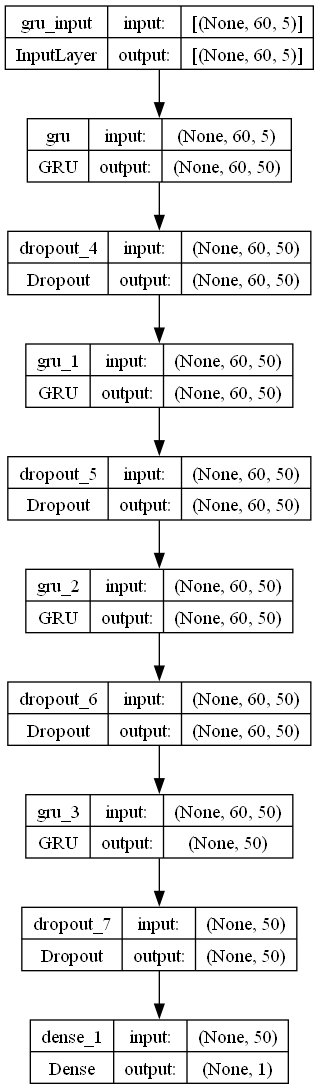

In [ ]:
from keras.utils import plot_model
plot_model(regressorGRU, to_file='model.png', show_shapes=True, show_layer_names=True) # plot my model

In [ ]:
history=regressorGRU.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=(x_val, y_val),callbacks=[mc, earlystop])

Epoch 1/200
61/61 [==============================] - 5s 29ms/step - loss: 0.0328 - val_loss: 0.0029
Epoch 2/200
61/61 [==============================] - 1s 14ms/step - loss: 0.0065 - val_loss: 0.0023
Epoch 3/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0058 - val_loss: 0.0026
Epoch 4/200
61/61 [==============================] - 1s 14ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 5/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 6/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 7/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 8/200
61/61 [==============================] - 1s 13ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 9/200
61/61 [==============================] - 1s 14ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 10/200
61/61 [==============================] - 1s 14ms/step - loss: 0.0033 - val_loss: 0.0030

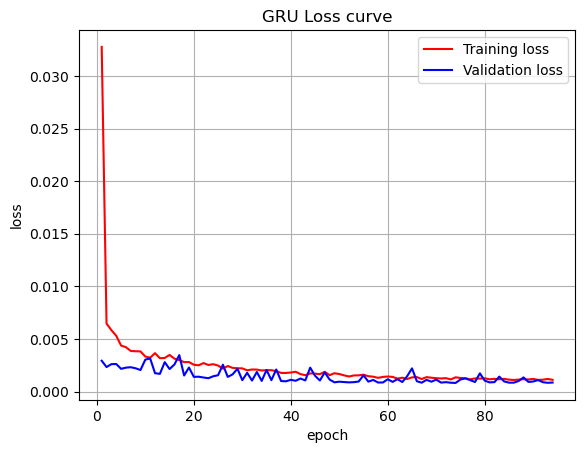

In [ ]:
#画损失曲线图
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.title('GRU Loss curve')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
sc_one = MinMaxScaler(feature_range = (0, 1))
sc_one.fit_transform(all_data.iloc[:, 1:2])
predicted_stock_train = regressorGRU.predict(x_train)
predicted_stock_train = sc_one.inverse_transform(predicted_stock_train)
predicted_stock_test = regressorGRU.predict(x_test)
predicted_stock_test = sc_one.inverse_transform(predicted_stock_test)
real_price_train=sc_one.inverse_transform(np.reshape(y_train,(-1,1)))
real_price_test=sc_one.inverse_transform(np.reshape(y_test,(-1,1)))

6/6 [==============================] - 0s 5ms/step


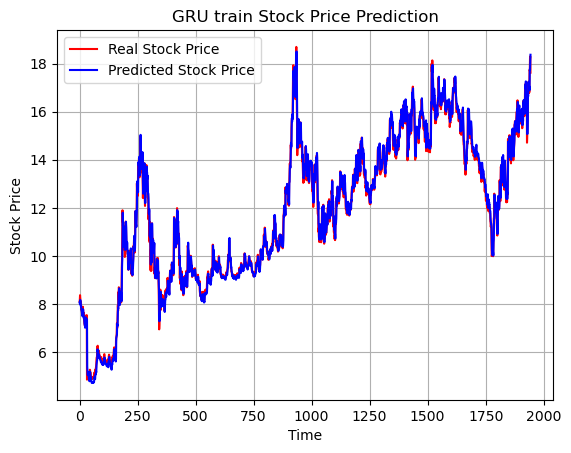

In [ ]:
# Visualising the test results
plt.plot(real_price_train, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('GRU train Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

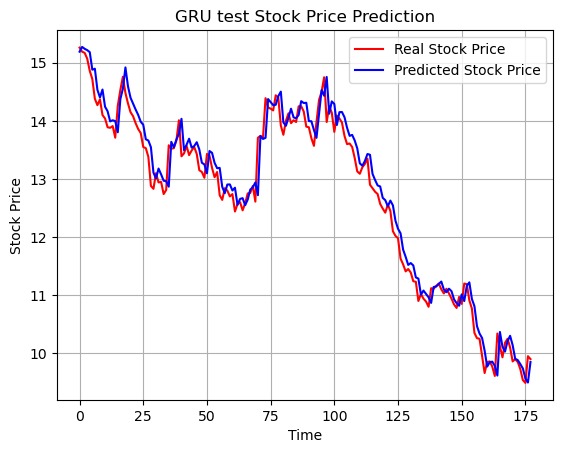

In [ ]:
# Visualising the test results
plt.plot(real_price_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_test, color = 'blue', label = 'Predicted Stock Price')
plt.title('GRU test Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import math
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_test, real_price_test)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt( mean_squared_error(predicted_stock_test, real_price_test))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_test, real_price_test)

mape = mean_absolute_percentage_error(predicted_stock_test, real_price_test)

r2=r2_score(predicted_stock_test, real_price_test)

print('GRU模型的MSE是: %.6f' % mse)
print('GRU模型的RMSE是: %.6f' % rmse)
print('GRU模型的MAE是: %.6f' % mae)
print('GRU模型的MAPE是: %.6f' % mape)
print('GRU模型的R^2是: %.6f' % r2)

GRU模型的MSE是: 0.070219
GRU模型的RMSE是: 0.264988
GRU模型的MAE是: 0.205460
GRU模型的MAPE是: 0.016080
GRU模型的R^2是: 0.970474


In [ ]:
# BiLSTM
regressorBiLSTM = Sequential()
# firt LSTM layer
regressorBiLSTM.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1],5), merge_mode='concat'))
regressorBiLSTM.add(Dropout(0.2))
# second LSTM layer
regressorBiLSTM.add(Bidirectional(LSTM(units=50, return_sequences=True)))
regressorBiLSTM.add(Dropout(0.2))
# third LSTM layer
regressorBiLSTM.add(Bidirectional(LSTM(units=50, return_sequences=True)))
regressorBiLSTM.add(Dropout(0.2))
# fourth LSTM layer
regressorBiLSTM.add(Bidirectional(LSTM(units=50)))
regressorBiLSTM.add(Dropout(0.2))
# output layer
regressorBiLSTM.add(Dense(units=1))
# compile the RNN
regressorBiLSTM.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
print(regressorBiLSTM.summary()) # Summarize Model 模型可视化

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 100)          22400     
 l)                                                              
                                                                 
 dropout_8 (Dropout)         (None, 60, 100)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 100)          60400     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 60, 100)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 60, 100)          60400     
 nal)                                                            
                                                      

In [ ]:
# fit to the training set
history=regressorBiLSTM.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=(x_val, y_val),callbacks=[mc, earlystop])

Epoch 1/200
61/61 [==============================] - 8s 48ms/step - loss: 0.0196 - val_loss: 0.0036
Epoch 2/200
61/61 [==============================] - 2s 25ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 3/200
61/61 [==============================] - 2s 26ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 4/200
61/61 [==============================] - 2s 26ms/step - loss: 0.0036 - val_loss: 0.0057
Epoch 5/200
61/61 [==============================] - 2s 25ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 6/200
61/61 [==============================] - 2s 25ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 7/200
61/61 [==============================] - 2s 25ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 8/200
61/61 [==============================] - 1s 23ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 9/200
61/61 [==============================] - 1s 23ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 10/200
61/61 [==============================] - 1s 23ms/step - loss: 0.0025 - val_loss: 0.0024

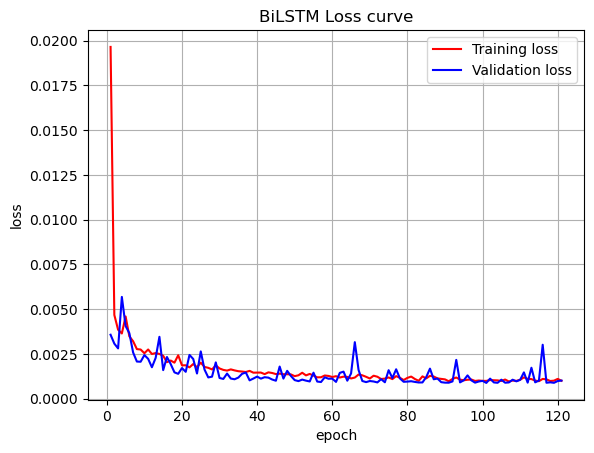

In [ ]:
#画损失曲线图
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.title('BiLSTM Loss curve')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
sc_one = MinMaxScaler(feature_range = (0, 1))
sc_one.fit_transform(all_data.iloc[:, 1:2])
predicted_stock_train = regressorBiLSTM.predict(x_train)
predicted_stock_train = sc_one.inverse_transform(predicted_stock_train)
predicted_stock_test = regressorBiLSTM.predict(x_test)
predicted_stock_test = sc_one.inverse_transform(predicted_stock_test)
real_price_train=sc_one.inverse_transform(np.reshape(y_train,(-1,1)))
real_price_test=sc_one.inverse_transform(np.reshape(y_test,(-1,1)))

6/6 [==============================] - 0s 9ms/step


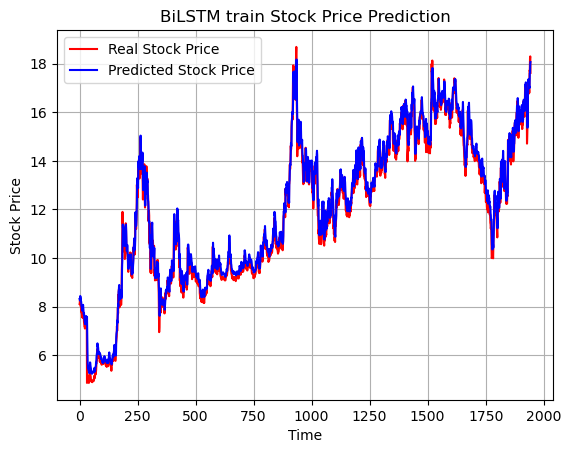

In [ ]:
# Visualising the test results
plt.plot(real_price_train, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('BiLSTM train Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

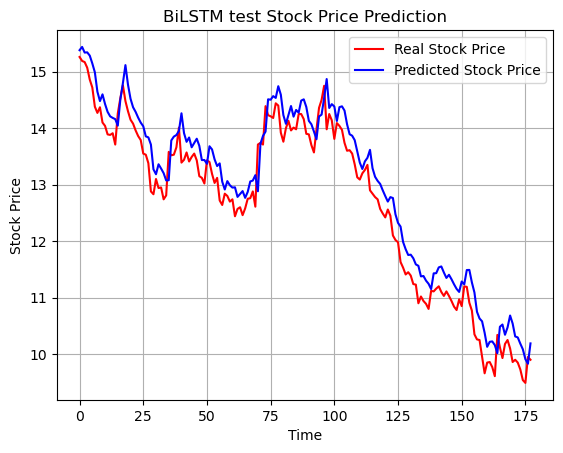

In [ ]:
# Visualising the test results
plt.plot(real_price_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_test, color = 'blue', label = 'Predicted Stock Price')
plt.title('BiLSTM test Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import math
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_test, real_price_test)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt( mean_squared_error(predicted_stock_test, real_price_test))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_test, real_price_test)

mape = mean_absolute_percentage_error(predicted_stock_test, real_price_test)

r2=r2_score(predicted_stock_test, real_price_test)

print('BiLSTM模型的MSE是: %.6f' % mse)
print('BiLSTM模型的RMSE是: %.6f' % rmse)
print('BiLSTM模型的MAE是: %.6f' % mae)
print('BiLSTM模型的MAPE是: %.6f' % mape)
print('BiLSTM模型的R^2是: %.6f' % r2)

BiLSTM模型的MSE是: 0.158608
BiLSTM模型的RMSE是: 0.398257
BiLSTM模型的MAE是: 0.356924
BiLSTM模型的MAPE是: 0.028071
BiLSTM模型的R^2是: 0.927108
